#### Tarea 4 - Modelo de Clustering (K-Means) - Grupo62 - By: Martha Jimenez Rojas

In [2]:
# Se cargan las librerias necesarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go # Creación de gráficos en tres dimensiones
import plotly.express as px # Creación de gráficos en tres dimensiones
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')


In [4]:
# Se carga el datasel mall_custumers
datosMC = pd.read_csv('D:/tarea_4/Mall_Customers.csv')

In [6]:
datosMC.head(10)

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
5           6  Female   22                  17                      76
6           7  Female   35                  18                       6
7           8  Female   23                  18                      94
8           9    Male   64                  19                       3
9          10  Female   30                  19                      72

In [8]:
# Se observa la descripcion de los Datos
datosMC.describe()

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

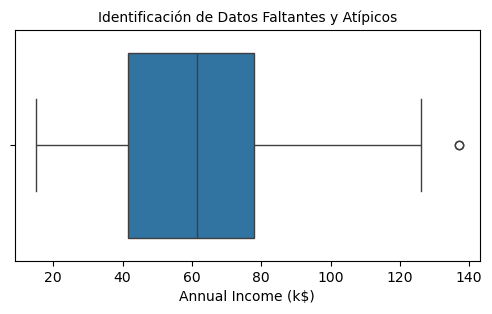

In [10]:
# Se identifican los Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=datosMC['Annual Income (k$)'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

In [12]:
# Se revisian los datos faltantes

print("Cantidad de Registros con cero en Age (Edad): ",datosMC['Age'].isin([0]).sum())
print("Cantidad de Registros con cero en Annual Income (Ingreso anual): ",datosMC['Annual Income (k$)'].isin([0]).sum())
print("Cantidad de Registros con cero en Spending Score (1-100) (Puntuacion en Gastos): ",datosMC['Spending Score (1-100)'].isin([0]).sum())

Cantidad de Registros con cero en Age (Edad):  0
Cantidad de Registros con cero en Annual Income (Ingreso anual):  0
Cantidad de Registros con cero en Spending Score (1-100) (Puntuacion en Gastos):  0


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

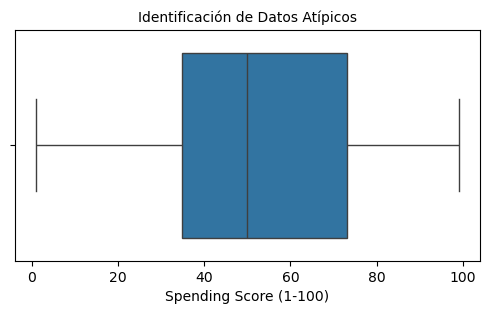

In [14]:
# Se identifican los Datos Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=datosMC['Spending Score (1-100)'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [16]:
# Se realiza el conteo de Datos Atípicos

nivel_minimo=0
nivel_maximo=100
Total_Atipicos=((datosMC['Spending Score (1-100)']<nivel_minimo)|(datosMC['Spending Score (1-100)']>nivel_maximo)).sum()
print("El total de datos atípicos es: {}".format(Total_Atipicos))

El total de datos atípicos es: 0


In [18]:
# Se filtran los Datos Atípicos

datosMC=datosMC[(datosMC['Spending Score (1-100)']<nivel_maximo)&(datosMC['Spending Score (1-100)']>nivel_minimo)]

In [20]:
# Se analiza la estructura del DataFrame (Cant de filas y columnas, tipo de dato, valores faltantes y memoria).
print(datosMC.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


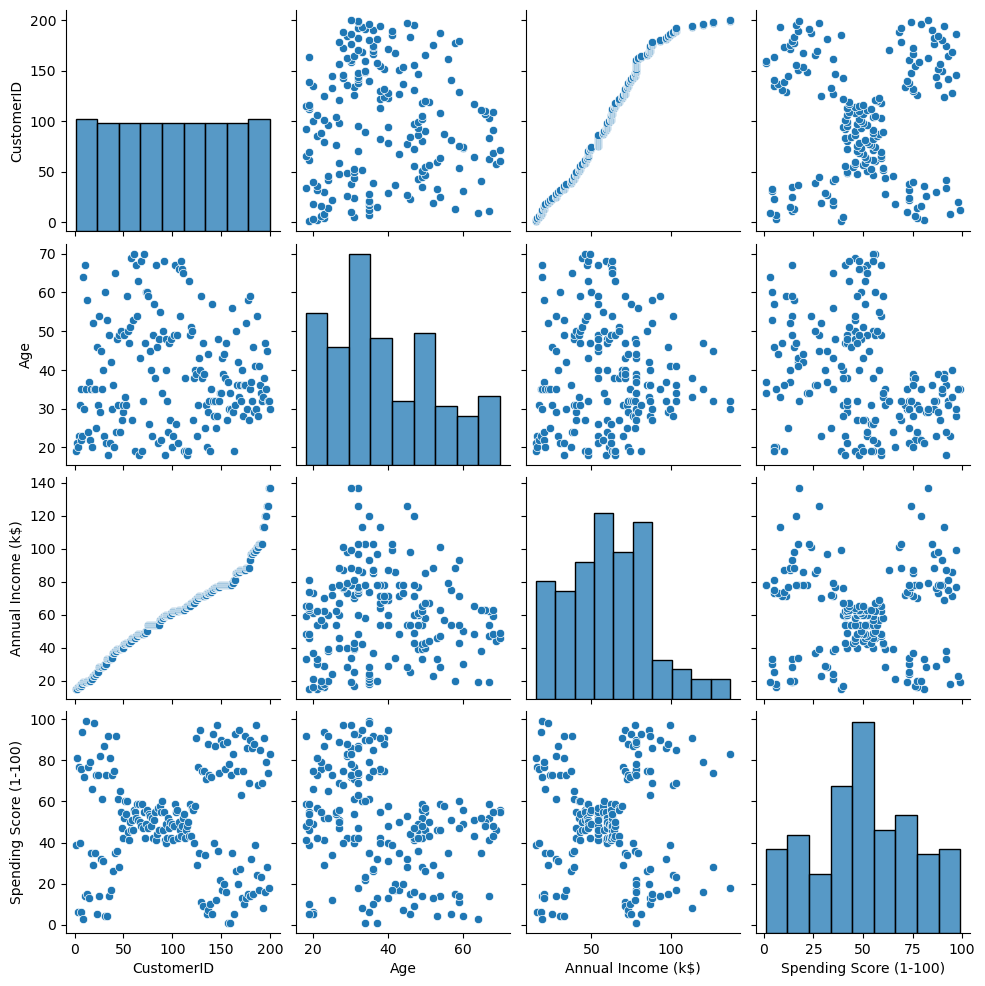

In [22]:
# Se visualizan las relaciones entre variables
sns.pairplot(datosMC)
plt.show()

In [24]:
# Se filtran las columnas del modelo 
datosMC = datosMC[["Age","Annual Income (k$)","Spending Score (1-100)"]]

In [26]:
# Se visualizan las columnas filtradas del modelo
datosMC.head(10)

Age  Annual Income (k$)  Spending Score (1-100)
0   19                  15                      39
1   21                  15                      81
2   20                  16                       6
3   23                  16                      77
4   31                  17                      40
5   22                  17                      76
6   35                  18                       6
7   23                  18                      94
8   64                  19                       3
9   30                  19                      72

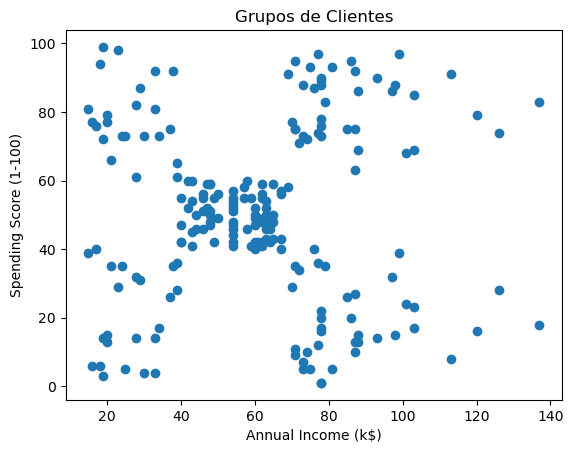

In [28]:
# Se visualiza la grafica antes del agrupamiento

plt.scatter(datosMC['Annual Income (k$)'], datosMC['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Grupos de Clientes')
plt.show()

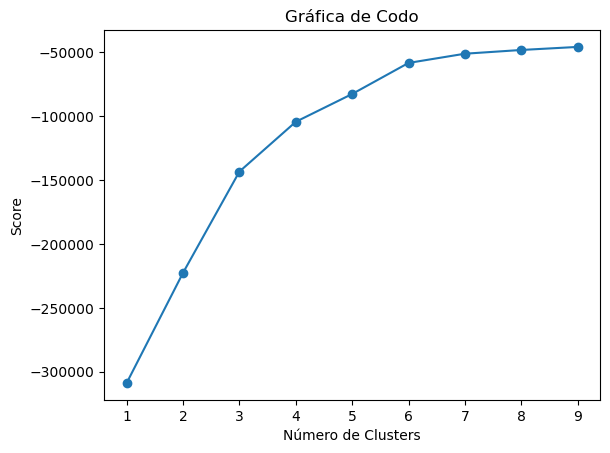

In [30]:
# Se realiza la gráfica de codo para identificar valor de K

Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(datosMC).score(datosMC) for i in range(len(kmeans))]
score
plt.plot(Nc,score, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Gráfica de Codo')
plt.show()

In [32]:
# Se genera el modelo de Agrupamiento del modelo con K=6
Modelo = KMeans(n_clusters=6, random_state=0)
Modelo.fit(datosMC)

KMeans(n_clusters=6, random_state=0)

In [34]:
#Se agrega la columna Group al dataset inicial para identificar el numero de grupo del agrupamiento
Modelo.labels_
datosMC["Group"] = Modelo.labels_ 
print (datosMC)

     Age  Annual Income (k$)  Spending Score (1-100)  Group
0     19                  15                      39      2
1     21                  15                      81      5
2     20                  16                       6      2
3     23                  16                      77      5
4     31                  17                      40      2
..   ...                 ...                     ...    ...
195   35                 120                      79      1
196   45                 126                      28      3
197   32                 126                      74      1
198   32                 137                      18      3
199   30                 137                      83      1

[200 rows x 4 columns]


In [36]:
#Se visualiza una porsion de los datos
datosMC.iloc[180:200]


Age  Annual Income (k$)  Spending Score (1-100)  Group
180   37                  97                      32      3
181   32                  97                      86      1
182   46                  98                      15      3
183   29                  98                      88      1
184   41                  99                      39      3
185   30                  99                      97      1
186   54                 101                      24      3
187   28                 101                      68      1
188   41                 103                      17      3
189   36                 103                      85      1
190   34                 103                      23      3
191   32                 103                      69      1
192   33                 113                       8      3
193   38                 113                      91      1
194   47                 120                      16      3
195   35                 120                      79      1
196   45                 126                      28      3
197   32                 126                      74      1
198   32                 137                      18      3
199   30                 137                      83      1

In [38]:
# Se evala el desempeño del modelo con el Coeficiente de Silhouette el Índice de Calinski-Harabasz y el índice de Davies Bouldin Score

# Se prepara la metrica de la columna Grupo
Observaciones = len(datosMC)
X = datosMC.drop('Group', axis=1)
clusters = datosMC['Group']

# Se calculan las métricas
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

# Se crea una tabla para mostrar los valores de las métricas
table_data = [
    ["Numero de Observaciones", Observaciones],
    ["Coeficiente Silhouette", sil_score],
    ["Indice Calinski Harabasz", calinski_score],
    ["Indice Davies Bouldin", davies_score]
]

# Se visualiza la tabla
from tabulate import tabulate
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))

+--------------------------+---------------------+
|          Metric          |        Value        |
+--------------------------+---------------------+
| Numero de Observaciones  |         200         |
|  Coeficiente Silhouette  | 0.45095124469943243 |
| Indice Calinski Harabasz |  166.5857109469557  |
|  Indice Davies Bouldin   | 0.7515325100425706  |
+--------------------------+---------------------+


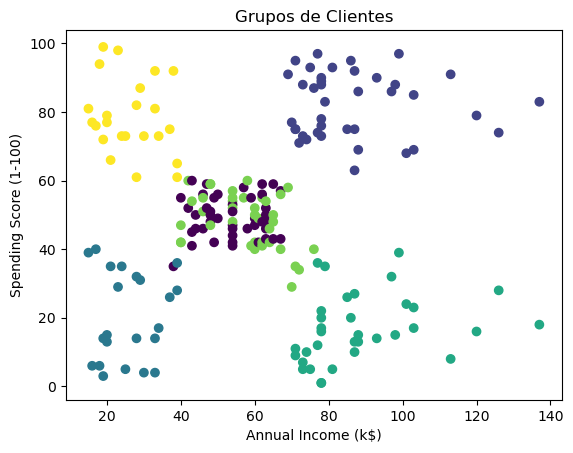

In [40]:
# Se realizan las diferentes gráficas que permitan visualizar los resultados del modelo
plt.scatter(datosMC['Annual Income (k$)'], datosMC['Spending Score (1-100)'], c=datosMC['Group'], cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Grupos de Clientes')
plt.show()

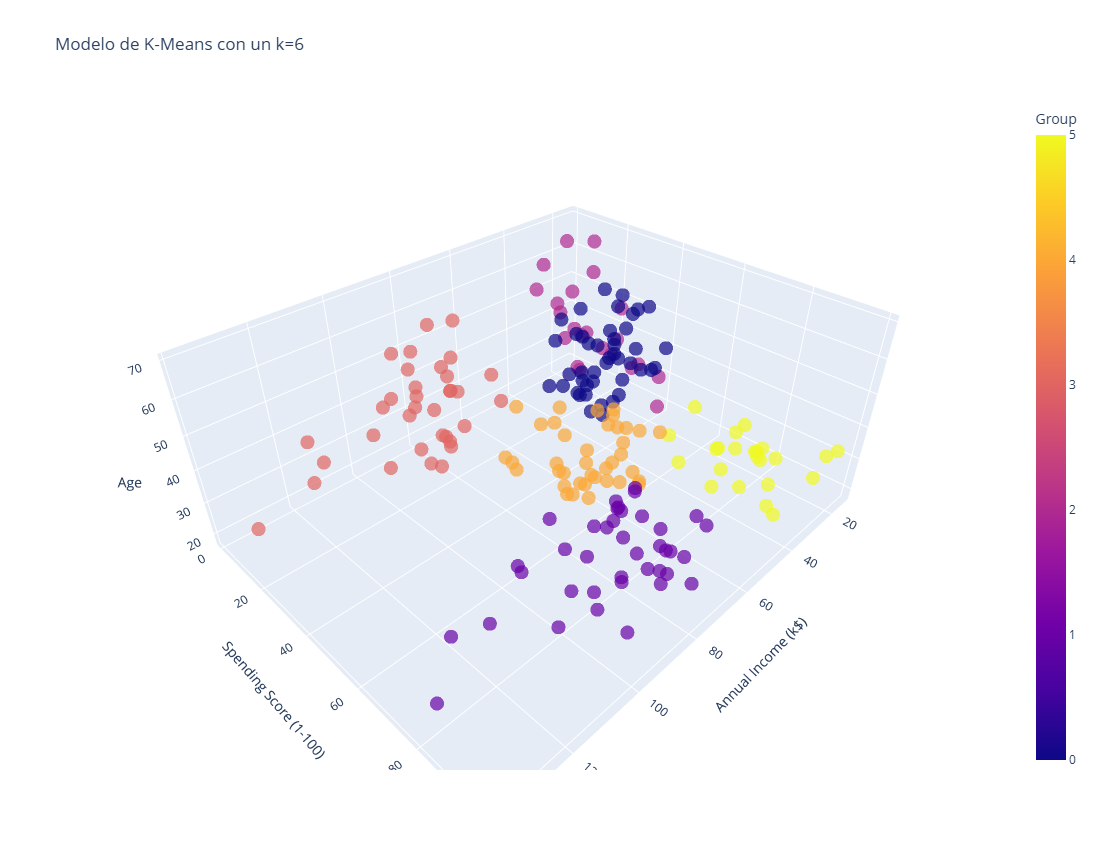

In [42]:
# Se crea un modelo 3D de los datos agrupados

Grafica_3D = px.scatter_3d(datosMC, x='Annual Income (k$)', y='Spending Score (1-100)', z='Age', color='Group', symbol='Group', symbol_map={0: 'circle', 1: 'circle', 2: 'circle', 3: 'circle', 4: 'circle', 5: 'circle'}, opacity=0.7, width=900, height=850, title=f'Modelo de K-Means con un k={6}', labels={'label': 'Cluster'}, color_discrete_map={})
Grafica_3D.update_layout(showlegend=False) 